In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import triang

# 設定隨機種子以確保結果可重現

# Q1:

In [2]:
def dailychips():
    """Q1: 每天送出的晶片數量和正確接受率

    Returns:
        num_daily_delivered: 每天會被送出的 chips 數量
        correctly_accepted_ratio: 正確接受好的 chips 的比例
    """
    num_all_chips = 8000  # 20x8x50 = 8000
    num_daily_delivered = 0  # 每天會被送出的 chips
    good_rate = 0.83  # 製造出來的 chips 有 83% 是好的

    # 先把 chips 變成 8000 個好或壞的陣列 (1表示好的, 0表示有瑕疵)
    chips = np.random.binomial(
        n=1,
        p=good_rate,
        size=num_all_chips
    )

    # 針對好的晶片
    good_chips = chips == 1
    # 針對有瑕疵的晶片
    defective_chips = chips == 0

    # 正確接受好的晶片的數量 (95% 的接受率)
    accepted_good = np.sum(np.random.binomial(1, 0.95,
                                              np.sum(good_chips)))
    # 錯誤接受有瑕疵的晶片的數量 (10% 的接受率)
    accepted_defective = np.sum(np.random.binomial(1, 0.10,
                                                   np.sum(defective_chips)))

    # 總交付晶片數量
    num_daily_delivered = accepted_good + accepted_defective
    # 好的晶片比例

    # 避免除以 0 的情況
    correctly_accepted_ratio = accepted_good / num_daily_delivered \
    if num_daily_delivered > 0 else 0

    return num_daily_delivered, correctly_accepted_ratio


num_simulations = 10000
counta = 0 # 計算正確接受率超過 98% 的次數
countb = 0 # 計算每天送交客戶的晶片數量超過 6400 的次數

for i in range(num_simulations): # 進行 10000 次模擬
    num_daily_delivered, correctly_accepted_ratio = dailychips() # 每次模擬的結果
    if correctly_accepted_ratio >= 0.98: # 如果正確接受率超過 98%
        counta += 1
    if num_daily_delivered >= 6400: # 如果每天送交客戶的晶片數量超過 6400
        countb += 1

print(" (a) 製造商聲稱每天送交客戶的微晶片至少有 98% 是好的。該聲明為真的機率是多少？",
      counta / num_simulations)
print(" (b) 製造商每天能交付 6,400 顆被檢查員接受的晶片的機率是多少？",
      countb / num_simulations)

 (a) 製造商聲稱每天送交客戶的微晶片至少有 98% 是好的。該聲明為真的機率是多少？ 0.2746
 (b) 製造商每天能交付 6,400 顆被檢查員接受的晶片的機率是多少？ 0.896


# Q2

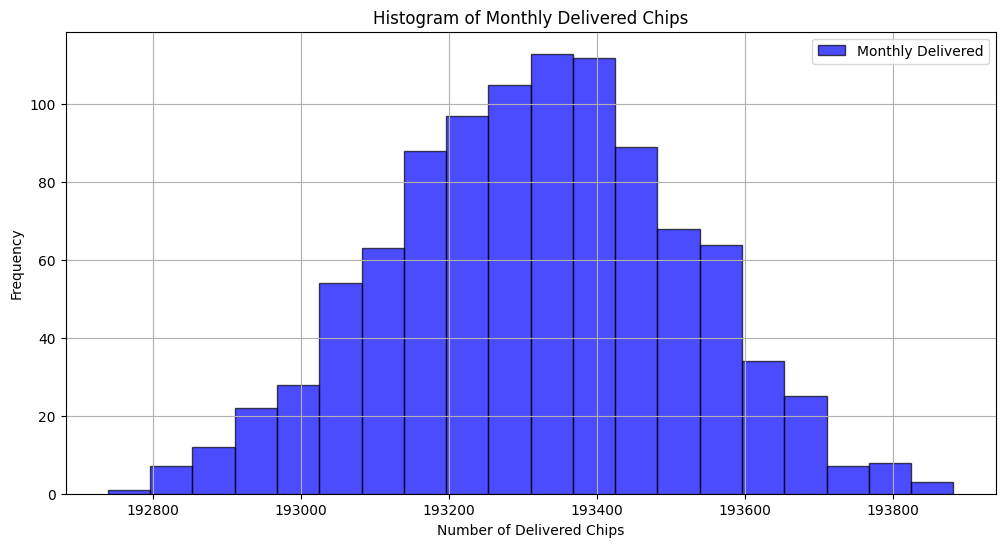

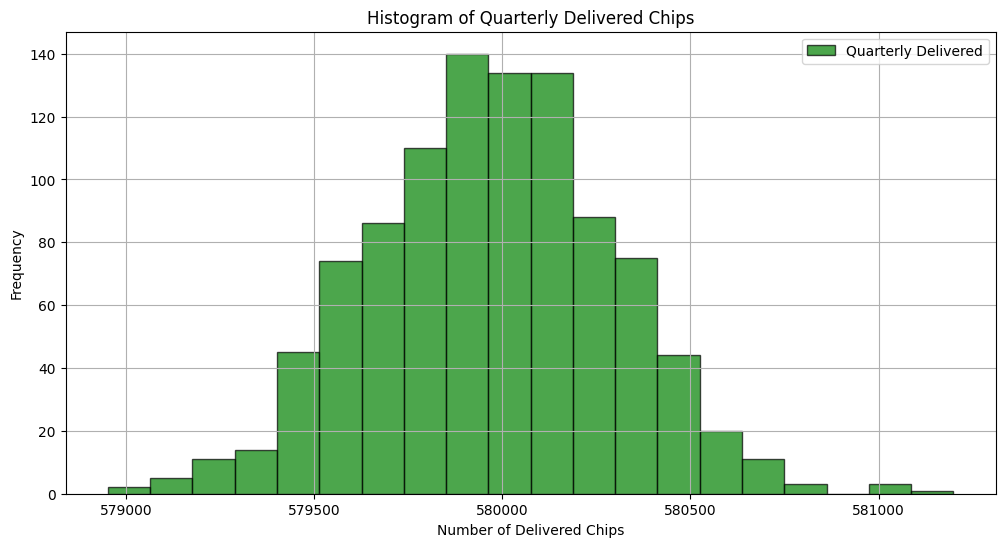

Shapiro-Wilk Test for Monthly Delivered Chips:       Statistic=0.9982,       p-value=0.3705
Shapiro-Wilk Test for Quarterly Delivered Chips:       Statistic=0.9987,       p-value=0.6823
每月送出的晶片數量符合常態分佈 (無法拒絕 H0)。
每季送出的晶片數量符合常態分佈 (無法拒絕 H0)。

Shapiro-Wilk 檢驗：
Shapiro-Wilk 檢驗是一種常用的常態性檢驗方法。其原假設 (H0) 為「數據來自常態分佈」。
如果 p 值小於或等於顯著水準（例如 0.05），則拒絕原假設，表示數據不符合常態分佈。

這表明：
每月送出晶片數量：p-value = 0.37053757759268885 > 0.05 → 符合 
每季送出晶片數量：p-value = 0.6822607003357949 > 0.05 → 符合 

中央極限定理 是統計學中一個非常重要的定理，它指出：

不論原始的隨機變數分佈為何，只要是獨立且同分佈的隨機變數，其總和（或平均值）在樣本量足夠大時，
將近似於常態分佈。



In [3]:
def monthlychips():
    """
    模擬一個月（30 天）送出的晶片總數量

    Returns:
        total_monthly_delivered: 一個月送出的晶片總數量
    """
    num_days = 30
    total_monthly_delivered = 0
    for _ in range(num_days):
        num_daily_delivered, _ = dailychips()
        total_monthly_delivered += num_daily_delivered
    return total_monthly_delivered

def quarterlychips():
    """
    模擬一個季度（90 天）送出的晶片總數量

    Returns:
        total_quarterly_delivered: 一個季度送出的晶片總數量
    """
    num_days = 90
    total_quarterly_delivered = 0
    for _ in range(num_days):
        num_daily_delivered, _ = dailychips()
        total_quarterly_delivered += num_daily_delivered
    return total_quarterly_delivered

monthly_delivered = []      # 存放每月送出的晶片數量
quarterly_delivered = []    # 存放每季度送出的晶片數量
num_simulations = 1000      # 進行 1000 次模擬

for _ in range(num_simulations):
    monthly_delivered.append(monthlychips())
    quarterly_delivered.append(quarterlychips())

# 繪製分開的直方圖以便更清楚比較
plt.figure(figsize=(12, 6))
plt.hist(monthly_delivered, bins=20, alpha=0.7, label='Monthly Delivered',
         color='blue', edgecolor='black')
plt.title('Histogram of Monthly Delivered Chips')
plt.xlabel('Number of Delivered Chips')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(quarterly_delivered, bins=20, alpha=0.7, label='Quarterly Delivered',
         color='green', edgecolor='black')
plt.title('Histogram of Quarterly Delivered Chips')
plt.xlabel('Number of Delivered Chips')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

# 常態性檢驗
shapiro_monthly = stats.shapiro(monthly_delivered)
shapiro_quarterly = stats.shapiro(quarterly_delivered)

print(f"Shapiro-Wilk Test for Monthly Delivered Chips: \
      Statistic={shapiro_monthly.statistic:.4f},\
       p-value={shapiro_monthly.pvalue:.4f}")
print(f"Shapiro-Wilk Test for Quarterly Delivered Chips: \
      Statistic={shapiro_quarterly.statistic:.4f},\
       p-value={shapiro_quarterly.pvalue:.4f}")

# 判斷是否符合常態分佈
alpha = 0.05
if shapiro_monthly.pvalue > alpha:
    print("每月送出的晶片數量符合常態分佈 (無法拒絕 H0)。")
    message_m = "符合"
else:
    print("每月送出的晶片數量不符合常態分佈 (拒絕 H0)。")
    message_m = "不符合"

if shapiro_quarterly.pvalue > alpha:
    print("每季送出的晶片數量符合常態分佈 (無法拒絕 H0)。")
    message_q = "符合"
else:
    print("每季送出的晶片數量不符合常態分佈 (拒絕 H0)。")
    message_q = "不符合"

print(f"""
Shapiro-Wilk 檢驗：
Shapiro-Wilk 檢驗是一種常用的常態性檢驗方法。其原假設 (H0) 為「數據來自常態分佈」。
如果 p 值小於或等於顯著水準（例如 0.05），則拒絕原假設，表示數據不符合常態分佈。

這表明：
每月送出晶片數量：p-value = {shapiro_monthly.pvalue} > 0.05 → {message_m} 
每季送出晶片數量：p-value = {shapiro_quarterly.pvalue} > 0.05 → {message_q} 

中央極限定理 是統計學中一個非常重要的定理，它指出：

不論原始的隨機變數分佈為何，只要是獨立且同分佈的隨機變數，其總和（或平均值）在樣本量足夠大時，
將近似於常態分佈。
"""
)

# Q3-1

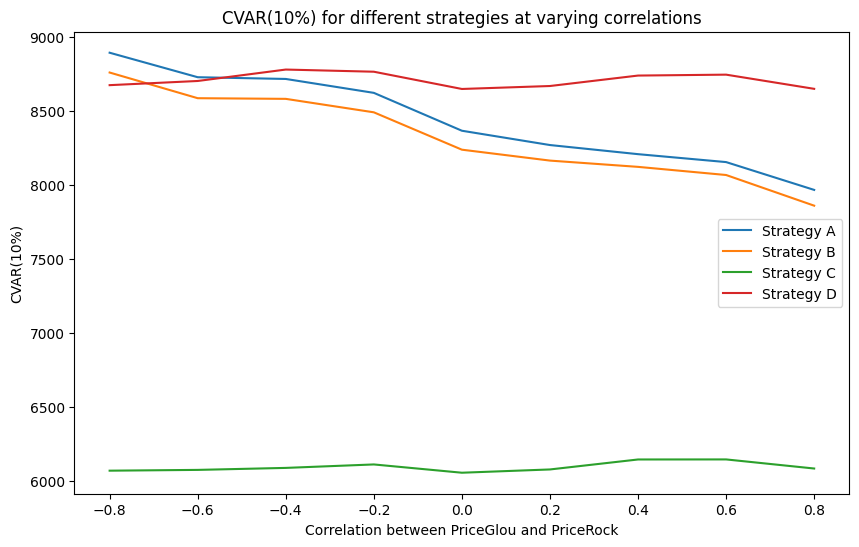


CVAR 是一種風險衡量指標，用於評估在最壞的情況下（例如最差的10%情況下）的平均損失。
最終結果顯示策略 D 的 CVaR(10%) 最高，這表示在最壞的10%情況下，該策略的平均利潤較其他策略更高。也就是說即使在最差的情況下，該策略仍能提供較好的利潤表現。
因此選擇 D 策略。



In [4]:
#Q3(1)
def simulate_price(corr):
  mean = [3.5, 3.65]
  cov = [[0.5**2, corr * 0.5 * 0.25], [corr * 0.5 * 0.25, 0.25**2]] #矩陣
  multiprices = np.random.multivariate_normal(mean, cov, 10000)
  return multiprices

def simulate_demand():
  DGlou = np.random.triangular(left=4000, mode=6000, right=8000, size=10000)
  DRock = np.random.triangular(left=4500, mode=6000, right=7500, size=10000)
  return DGlou, DRock

def simulate_capture():
  captured_rick = np.random.uniform(low=0.5, high=1.0, size=10000)  #Rick的捕獲
  captured_morty = np.random.triangular(left=0.5, mode=0.75, right=1.0, size=10000)  #Morty的捕獲
  return captured_rick, captured_morty

def calculate_profit(prices, demand, captured, operating_cost):
  PriceGlou, PriceRock = prices[0], prices[1]
  DGlou, DRock = demand[0], demand[1]
  Rick_captured, Morty_captured = captured[0], captured[1]
  profit_a = (min(Rick_captured * 3800, DGlou) * PriceGlou + min(Morty_captured * 3800, DRock) * PriceRock) - operating_cost
  profit_b = (min(Rick_captured * 3800, DRock) * PriceRock + min(Morty_captured * 3800, DGlou) * PriceGlou) - operating_cost
  profit_c = (min((Rick_captured + Morty_captured) * 3800, DGlou) * PriceGlou) - operating_cost
  profit_d = (min((Rick_captured + Morty_captured) * 3800, DRock) * PriceRock) - operating_cost
  return profit_a, profit_b, profit_c, profit_d

def calculate_cvar(profits):
  sorted_profits = np.sort(profits)
  cvar_10 = np.mean(sorted_profits[:int(0.1 * len(sorted_profits))])
  return cvar_10

def simulate_strategy(corr_values):
  cvar_results = { 'Strategy A': [], 'Strategy B': [], 'Strategy C': [], 'Strategy D': [] }

  for corr in corr_values:
    multiprices = simulate_price(corr)
    DGlou, DRock = simulate_demand()
    captured_rick, captured_morty = simulate_capture()

    profits = []
    for i in range(10000):
      prices = multiprices[i]
      demand = [DGlou[i], DRock[i]]
      captured = [captured_rick[i], captured_morty[i]]
      profit_a, profit_b, profit_c, profit_d = calculate_profit(prices, demand, captured, 7200)
      profits.append([profit_a, profit_b, profit_c, profit_d])

    profits = np.array(profits)
    cvar_results['Strategy A'].append(calculate_cvar(profits[:, 0]))
    cvar_results['Strategy B'].append(calculate_cvar(profits[:, 1]))
    cvar_results['Strategy C'].append(calculate_cvar(profits[:, 2]))
    cvar_results['Strategy D'].append(calculate_cvar(profits[:, 3]))
  return cvar_results

#繪製CVaR(10%)圖表
def plot_cvar_results(corr_values, cvar_results):
  plt.figure(figsize=(10, 6))
  for strategy, cvar in cvar_results.items():
    plt.plot(corr_values, cvar, label=strategy)

  plt.xlabel('Correlation between PriceGlou and PriceRock')
  plt.ylabel('CVAR(10%)')
  plt.legend()
  plt.title('CVAR(10%) for different strategies at varying correlations')
  plt.show()


#設定相關性值範圍
corr_values = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]
cvar_results = simulate_strategy(corr_values)
#繪圖顯示結果
plot_cvar_results(corr_values, cvar_results)

print(
"""
CVAR 是一種風險衡量指標，用於評估在最壞的情況下（例如最差的10%情況下）的平均損失。
最終結果顯示策略 D 的 CVaR(10%) 最高，這表示在最壞的10%情況下，該策略的平均利潤較其他策略更高。也就是說即使在最差的情況下，該策略仍能提供較好的利潤表現。
因此選擇 D 策略。
"""
)


# Q3-2

In [5]:
#Q3(2)
# 將標準化的需求變量反標準化回原來的範圍
def destandardize(data, mean, std_dev, min_val, max_val):
  scaled_data = data * std_dev + mean  # 反標準化
  return np.clip(scaled_data, min_val, max_val)  # 將數據限制在原始範圍內

# 模擬需求和價格，並反標準化需求
def simulate_demand_price(num_sim=10000):
  #設定需求和價格的相關矩陣和標準差
  corr_matrix = np.array([
   #DGlou, DRock, PriceGlou, PriceRock
    [1.0,  0, -0.5, -0.4],
    [ 0, 1.0, -0.3, -0.5],
    [-0.5, -0.3, 1.0, 0.5],
    [-0.4, -0.5, 0.5, 1.0]
  ])
  means = [0, 0, 3.5, 3.65]  #DGlou, DRock, PriceGlou, PriceRock 的均值
  std_devs = [1, 1, 0.5, 0.25]  #DGlou, DRock, PriceGlou, PriceRock 的標準差
  cov_matrix = np.outer(std_devs, std_devs) * corr_matrix #np.outer(std_devs, std_devs)是外積
  data = np.random.multivariate_normal(means, cov_matrix, num_sim)

  #destandardize
  # mean = (min+mode+max)/3
  # std_dev = sqrt((min^2 + mode^2 + max^2) - 3 * mean^2) / sqrt(18)
  DGlou = destandardize(data[:, 0], 6000, 2000, 4000, 8000)
  DRock = destandardize(data[:, 1], 6000, 1500, 4500, 7500)

  PriceGlou = data[:, 2]
  PriceRock = data[:, 3]

  return DGlou, DRock, PriceGlou, PriceRock

# 模擬策略
def simulate_strategy(num_sim=10000, operating_cost=7200):
  cvar_results = { 'Strategy A': [], 'Strategy B': [], 'Strategy C': [], 'Strategy D': [] }

  DGlou, DRock, PriceGlou, PriceRock = simulate_demand_price(num_sim)
  captured_rick = np.random.uniform(0.5, 1.0, num_sim)
  captured_morty = triang.rvs(0.5, loc=0.5, scale=0.5, size=num_sim)

  profits = []
  for i in range(num_sim):
    prices = [PriceGlou[i], PriceRock[i]]
    demand = [DGlou[i], DRock[i]]
    captured = [captured_rick[i], captured_morty[i]]
    profit_a, profit_b, profit_c, profit_d = calculate_profit(prices, demand, captured, operating_cost)
    profits.append([profit_a, profit_b, profit_c, profit_d])

  profits = np.array(profits)
  cvar_results['Strategy A'] = calculate_cvar(profits[:, 0])
  cvar_results['Strategy B'] = calculate_cvar(profits[:, 1])
  cvar_results['Strategy C'] = calculate_cvar(profits[:, 2])
  cvar_results['Strategy D'] = calculate_cvar(profits[:, 3])

  return cvar_results,profits

# 執行模擬
cvar_results, profits = simulate_strategy()

# 顯示 CVaR(10%) 結果
print("CVaR(10%) 結果：")
for strategy, cvar_value in cvar_results.items():
  print(f"{strategy}: {cvar_value:.2f}")

# 顯示每種策略的利潤
print("\n每種策略的利潤期望值：")
for i, strategy in enumerate(cvar_results.keys()):
  avg_profit = np.mean(profits[:, i])
  print(f"{strategy} 平均利潤: {avg_profit:.2f}")

CVaR(10%) 結果：
Strategy A: 8199.90
Strategy B: 8085.58
Strategy C: 5890.48
Strategy D: 8509.27

每種策略的利潤期望值：
Strategy A 平均利潤: 13255.43
Strategy B 平均利潤: 13253.34
Strategy C 平均利潤: 10781.56
Strategy D 平均利潤: 12080.63


# Q4

Expected highest bid with 1 bidders:     $2,999,252.41
Expected highest bid with 2 bidders:     $3,195,437.19
Expected highest bid with 3 bidders:     $3,297,009.10
Expected highest bid with 4 bidders:     $3,362,831.81
Expected highest bid with 5 bidders:     $3,406,978.09
Expected highest bid with 6 bidders:     $3,441,943.80
Expected highest bid with 7 bidders:     $3,473,117.30
Expected highest bid with 8 bidders:     $3,497,713.97
Expected highest bid with 9 bidders:     $3,522,931.70
Expected highest bid with 10 bidders:     $3,539,149.11


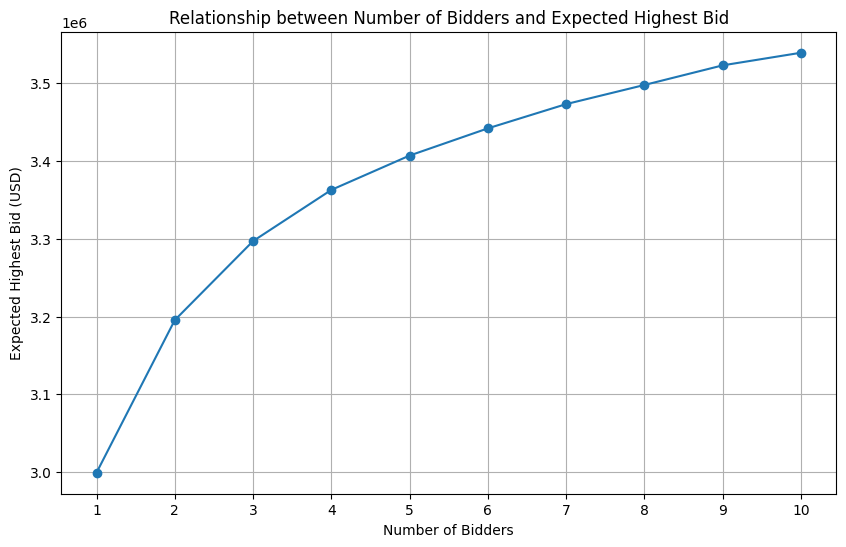


根據模擬的結果發現，
隨著出價的人數越多，預期的收入也跟著上漲，
但上漲的幅度越趨平緩。



In [6]:
mu = 3000000        # 平均值（美元）
sigma = 350000      # 標準差（美元）
num_simulations = 10000  # 模擬次數
max_bidders = 10   # 最大競標者數量

# 記錄不同競標者數量下的最高出價
expected_max = []
all_max_values = {}

np.random.seed(42)  # 設定隨機種子以確保結果可重現

for bidders in range(1, max_bidders + 1):
    # 模擬每次競標者的出價
    bids = np.random.normal(mu, sigma, (num_simulations, bidders))
    # 計算每次模擬中的最高出價
    max_bids = np.max(bids, axis=1)
    # 計算預期最高出價
    mean_max = np.mean(max_bids)
    expected_max.append(mean_max)
    # 儲存所有最高出價以供後續分析
    all_max_values[bidders] = max_bids

# 顯示預期最高出價
for bidders in range(1, max_bidders + 1):
    print(f"Expected highest bid with {bidders} bidders: \
    ${expected_max[bidders-1]:,.2f}")

# 繪製預期最高出價隨競標者數量變化的圖表
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_bidders + 1), expected_max, marker='o')
plt.title('Relationship between Number of Bidders and Expected Highest Bid')
plt.xlabel('Number of Bidders')
plt.ylabel('Expected Highest Bid (USD)')
plt.grid(True)
plt.xticks(range(1, max_bidders + 1))
plt.show()

print("""
根據模擬的結果發現，
隨著出價的人數越多，預期的收入也跟著上漲，
但上漲的幅度越趨平緩。
""")